# Get and examine data

## Download data

In [1]:
# Necessary data science packages
import sys
from packaging import version
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np

wine_dataset = sklearn.datasets.load_wine()
wine_df = pd.DataFrame(data=wine_dataset.data, columns=wine_dataset.feature_names)
wine_df['labels'] = wine_dataset['target'] # Also add the labels associated with each sample

X, y = wine_dataset.data, wine_dataset.target

In [2]:
X.shape

(178, 13)

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [4]:
y.shape

(178,)

## Inspect the data

In [5]:
# Display the head of the wine dataframe. 
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,labels
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
# Display column names and types
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

In [7]:
# Get the value counts for each different type of wine. 
wine_df['labels'].value_counts()

1    71
0    59
2    48
Name: labels, dtype: int64

It seems that the labels are roughly balanced, although wine type #1 is the most common. Now, let's do a train-test split. 

In [8]:
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = shuffle_and_split_data(wine_df, 0.2)
len(train_set)

143

In [10]:
# Allows results of the notebook to be reproducible. 
np.random.seed(42)

In [11]:
len(test_set)

35

# Training and Predictions

## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(59,)

We have successfully performed a train-test split with 143 samples in the training set and 35 samples in the test set.
Since we are dealing with a small dataset for multi-class classification, it might be helpful to use the SVM classifier. 

In [14]:
from sklearn.svm import SVC

# Instantiate and fit on the training set. 
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

SVC(random_state=42)

In [15]:
# Predict on the testing set. 
predictions = svm_clf.predict(X_test)

In [16]:
# Now, let's evaluate the accuracy of the predictions. 
from sklearn.metrics import accuracy_score as accuracy
round(accuracy(y_test, predictions), 2)

0.71

We get an accuracy of around 71%. Let's plot our results in a confusion matrix. 

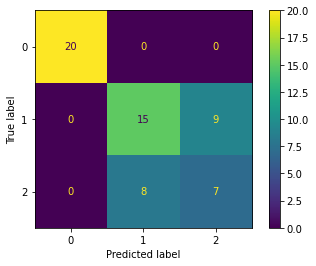

In [17]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix = metrics.confusion_matrix(y_test, predictions)
cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0,1,2])
cm.plot();

There are quite a few misclassified samples. Let's try using a different model to see if we get better results. We can use a Decision Tree. To avoid overfitting, let's set the max_depth to be 2. 

In [18]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

Now, let's visualize the resulting dendrogram. 

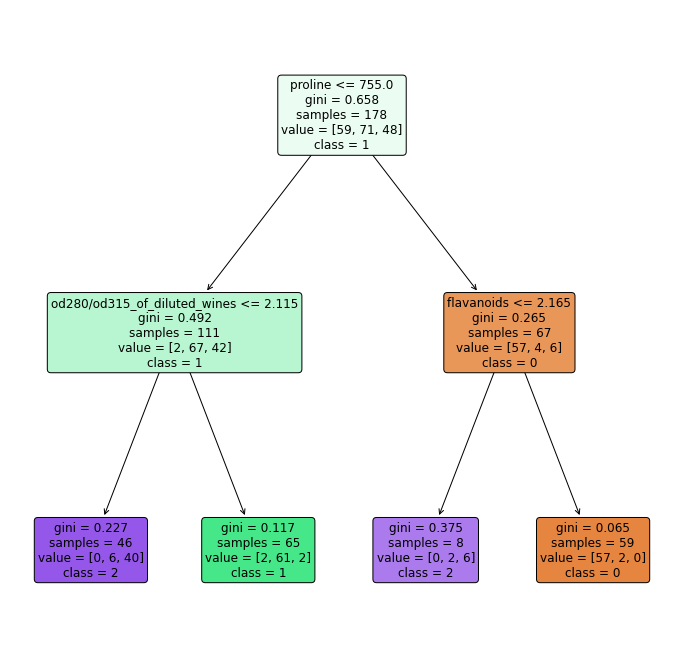

In [19]:
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from pathlib import Path

#Define the class labels. 
class_labels_str = [str(elem) for elem in set(y)]
wine_classes = np.array(class_labels_str)

plt.figure(figsize=(12,12))


dendro = sklearn.tree.plot_tree(tree_clf, filled=True, rounded=True, feature_names=wine_dataset.feature_names, 
                                class_names=wine_classes, fontsize=12)

plt.show()

From the dendrogram, we can see that there are less misclassifications than the support vector machine model. However, while the SVC model had 0 misclassifications for class 0, the DecisionTree misclassifies two samples as belonging to class 0. 

# Additional Visualizations

Let's now visualize wine samples based on the features picked out by the decision tree. We can indicate the true labels of the samples on the plot. 

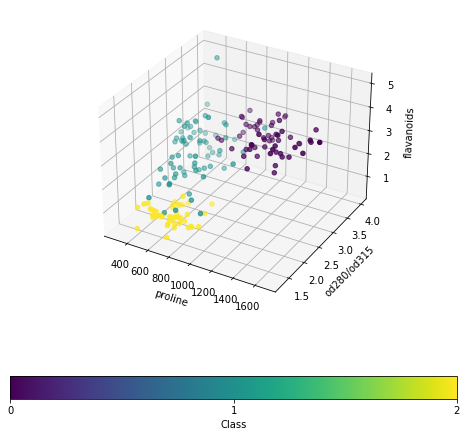

In [20]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(wine_df['proline'], wine_df['od280/od315_of_diluted_wines'], wine_df['flavanoids'], marker='o', c=wine_df['labels'])
ax.set_xlabel('proline')
ax.set_ylabel('od280/od315')
ax.set_zlabel('flavanoids')

# Add a legend
cbar = fig.colorbar(scatter, label="Class", orientation='horizontal')
cbar.set_ticks([0, 1, 2])
plt.show()

As we can see, it appears that these three features are good for distinguishing between the different wine classes. For the most part, the yellow, blue, and purple points don't overlap, although there are a few exceptions. 

# Attributions

1. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html
2. https://scikit-learn.org/stable/modules/svm.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
4. https://www.w3schools.com/python/python_ml_confusion_matrix.asp
5. https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree
6. https://stackoverflow.com/questions/59447378/sklearn-plot-tree-plot-is-too-small
7. https://stackoverflow.com/questions/6715442/how-to-add-matplotlib-colorbar-ticks
8. https://www.kaggle.com/code/cristianlapenta/wine-dataset-sklearn-machine-learning-project